In [75]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

## Reading the file

In [76]:
cust=pd.read_csv('customer_data_5pNwh8HRSV.csv')
cust

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


## Data Preprocessing

In [77]:
# Dropping columns ID and VAR_1

cust1=cust.drop(['ID','Var_1'],axis=1)
cust1

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [78]:
# Checking for null values

cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [79]:
# Dropping all the records having null values

cust2=cust1.dropna()
cust2

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [80]:
# Checking the column family_size

cust2['Family_Size'].value_counts()

2.0    2109
3.0    1302
1.0    1251
4.0    1184
5.0     531
6.0     180
7.0      81
8.0      42
9.0      38
Name: Family_Size, dtype: int64

In [81]:
# Dropping rows with family size = 7,8 and 9

list1 = [7.0,8.0,9.0]
 
# drop rows from above list
cust2=cust2[cust2.Family_Size.isin(list1) == False]

In [82]:
cust2

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [83]:
cust2['Family_Size'].value_counts()

2.0    2109
3.0    1302
1.0    1251
4.0    1184
5.0     531
6.0     180
Name: Family_Size, dtype: int64

In [84]:
# Target variable

cust2['Segmentation'].value_counts()

D    1704
C    1701
A    1590
B    1562
Name: Segmentation, dtype: int64

In [85]:
# Replacing the target variable 'Segmentation' categories with numericals
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
cust2['Segmentation'] = le.fit_transform(cust2['Segmentation'])
 
# printing label
cust2['Segmentation']

<ipython-input-85-41d3dba6d42a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust2['Segmentation'] = le.fit_transform(cust2['Segmentation'])


0       3
2       1
3       1
5       2
6       2
       ..
8062    1
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 6557, dtype: int64

In [86]:
cust2['Segmentation'].value_counts()

3    1704
2    1701
0    1590
1    1562
Name: Segmentation, dtype: int64

# Classification

The Given problem is a classification problem because the target variable Segmentation has 4 seperate classes.

Also since there are more than 2 classes, this is a Multiclass classification problem

## Seperating x and y from the dataset

In [87]:
y=cust2['Segmentation']
y

0       3
2       1
3       1
5       2
6       2
       ..
8062    1
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 6557, dtype: int64

In [88]:
x=cust2.drop(['Segmentation'],axis=1)
x

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
5,Male,Yes,56,No,Artist,0.0,Average,2.0
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0
8064,Male,No,35,No,Executive,3.0,Low,4.0
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0


## Converting all categorical features into numerical

In [89]:
x = pd.get_dummies(x, columns = ['Gender','Ever_Married','Graduated','Profession','Spending_Score'])
x

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,22,1.0,4.0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,67,0.0,2.0,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5,56,0.0,2.0,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,32,1.0,3.0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
8064,35,3.0,4.0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## Standardizing the data

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-1.31657656, -0.47807376,  0.96388   , ..., -0.58128326,
        -0.42069939,  0.82148668],
       [ 1.40855488, -0.47807376, -1.29816766, ..., -0.58128326,
        -0.42069939,  0.82148668],
       [ 1.40855488, -0.77183533, -0.54415177, ..., -0.58128326,
         2.3769942 , -1.2173052 ],
       ...,
       [-0.65043332, -0.47807376, -1.29816766, ..., -0.58128326,
        -0.42069939,  0.82148668],
       [-1.01378417, -0.47807376,  0.96388   , ..., -0.58128326,
        -0.42069939,  0.82148668],
       [-0.40819941, -0.77183533,  0.20986411, ...,  1.72033167,
        -0.42069939, -1.2173052 ]])

## Splitting into train and test

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=10)
x_train.shape,x_test.shape,y_train.shape,y_test.shape   

((5245, 21), (1312, 21), (5245,), (1312,))

# Question 2

## Model Building characteristics

Since the number of input features in 21. Its better to have number of units above 21 and hence it is choosen to be 30.

Since the output variable has 4 classes, the number of units in output layer will be 4 with Softmax as activation function.

Epoch 1/50
132/132 [==============================] - 1s 3ms/step - loss: 1.3182 - accuracy: 0.3911 - val_loss: 1.2008 - val_accuracy: 0.4709
Epoch 2/50
132/132 [==============================] - 0s 2ms/step - loss: 1.1438 - accuracy: 0.5029 - val_loss: 1.1539 - val_accuracy: 0.4833
Epoch 3/50
132/132 [==============================] - 0s 2ms/step - loss: 1.1098 - accuracy: 0.5122 - val_loss: 1.1331 - val_accuracy: 0.4929
Epoch 4/50
132/132 [==============================] - 0s 3ms/step - loss: 1.0944 - accuracy: 0.5193 - val_loss: 1.1229 - val_accuracy: 0.5014
Epoch 5/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0854 - accuracy: 0.5250 - val_loss: 1.1191 - val_accuracy: 0.4948
Epoch 6/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0785 - accuracy: 0.5262 - val_loss: 1.1141 - val_accuracy: 0.4995
Epoch 7/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0727 - accuracy: 0.5324 - val_loss: 1.1086 - val_accuracy: 0.5081
Epoch 

[1.056024193763733, 0.5335366129875183]

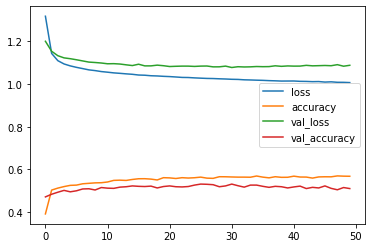

In [93]:
## Model Building
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(30,activation='relu'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))

## Compiling the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

## Training the model
tf.random.set_seed(10)
## Validation split
hist=model.fit(x_train,y_train,epochs=50, validation_split=0.2)
pd.DataFrame(hist.history).plot();

# Model Evaluation
print(' Evaluation Result:\n')
model.evaluate(x_test,y_test)

## Inference

The testing loss is more than the training loss, which means the model is overfitting

## Improving the model

Epoch 1/50
132/132 [==============================] - 1s 3ms/step - loss: 1.3026 - accuracy: 0.3982 - val_loss: 1.1801 - val_accuracy: 0.4757
Epoch 2/50
132/132 [==============================] - 0s 2ms/step - loss: 1.1473 - accuracy: 0.4929 - val_loss: 1.1423 - val_accuracy: 0.4938
Epoch 3/50
132/132 [==============================] - 0s 3ms/step - loss: 1.1130 - accuracy: 0.5153 - val_loss: 1.1229 - val_accuracy: 0.5033
Epoch 4/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0959 - accuracy: 0.5243 - val_loss: 1.1149 - val_accuracy: 0.5033
Epoch 5/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0853 - accuracy: 0.5298 - val_loss: 1.1122 - val_accuracy: 0.5033
Epoch 6/50
132/132 [==============================] - 1s 4ms/step - loss: 1.0775 - accuracy: 0.5343 - val_loss: 1.1078 - val_accuracy: 0.5081
Epoch 7/50
132/132 [==============================] - 1s 5ms/step - loss: 1.0719 - accuracy: 0.5346 - val_loss: 1.1050 - val_accuracy: 0.5024
Epoch 

[1.04652738571167, 0.5388719439506531]

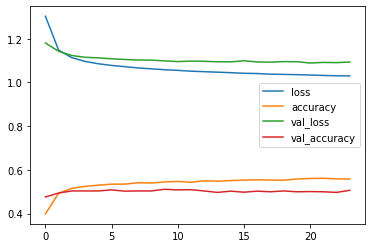

In [94]:
## Model Building
model_1=tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(30,activation='relu'))
model_1.add(tf.keras.layers.Dense(4,activation='softmax'))

## Compiling the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Introducing early stop
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)


## Training the model
tf.random.set_seed(10)
## Validation split
hist_1=model_1.fit(x_train,y_train,epochs=50, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist_1.history).plot();

# Model Evaluation
print(' Evaluation Result:\n')
model_1.evaluate(x_test,y_test)

## Inference

1) The testing loss 1.05 is more than the training loss 1.007, which means the model is overfitting

2) The testing loss is 1.04 and training loss is 1.02 , slight improvement

## Model with dropout

Epoch 1/50
132/132 [==============================] - 1s 6ms/step - loss: 1.0066 - accuracy: 0.5665 - val_loss: 1.0893 - val_accuracy: 0.5138
Epoch 2/50
132/132 [==============================] - 0s 3ms/step - loss: 1.0062 - accuracy: 0.5674 - val_loss: 1.0880 - val_accuracy: 0.5186
Epoch 3/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0054 - accuracy: 0.5720 - val_loss: 1.0849 - val_accuracy: 0.5167
Epoch 4/50
132/132 [==============================] - 0s 3ms/step - loss: 1.0045 - accuracy: 0.5648 - val_loss: 1.0851 - val_accuracy: 0.5157
Epoch 5/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0044 - accuracy: 0.5663 - val_loss: 1.0875 - val_accuracy: 0.5091
Epoch 6/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0041 - accuracy: 0.5705 - val_loss: 1.0889 - val_accuracy: 0.5081
Epoch 7/50
132/132 [==============================] - 0s 2ms/step - loss: 1.0034 - accuracy: 0.5648 - val_loss: 1.0883 - val_accuracy: 0.5138
Epoch 

[1.5613611936569214, 0.2614329159259796]

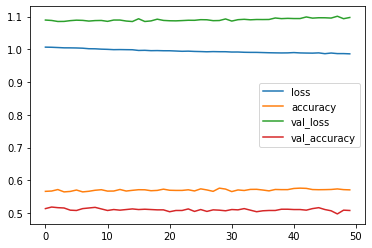

In [95]:
## Model Building
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(30,activation='relu'))

# Dropout layer
model2.add(tf.keras.layers.Dropout(0.1))

model2.add(tf.keras.layers.Dense(4,activation='softmax'))

## Compiling the model
model2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

## Training the model
tf.random.set_seed(10)
## Validation split
hist2=model.fit(x_train,y_train,epochs=50, validation_split=0.2)
pd.DataFrame(hist2.history).plot();

# Model Evaluation
print(' Evaluation Result:\n')
model2.evaluate(x_test,y_test)

## Inference

1) The testing loss 1.05 is more than the training loss 1.007, which means the model is overfitting

2) The testing loss is 1.04 and training loss is 1.02 , slight improvement

3) testing loss = 1.5 and traning loss= 0.98, model not improved

Epoch 1/50
132/132 [==============================] - 2s 4ms/step - loss: 1.3733 - accuracy: 0.3422 - val_loss: 1.2548 - val_accuracy: 0.4318
Epoch 2/50
132/132 [==============================] - 0s 2ms/step - loss: 1.1881 - accuracy: 0.4650 - val_loss: 1.1514 - val_accuracy: 0.4814
Epoch 3/50
132/132 [==============================] - 0s 2ms/step - loss: 1.1189 - accuracy: 0.5093 - val_loss: 1.1193 - val_accuracy: 0.5005
Epoch 4/50
132/132 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.5222 - val_loss: 1.1079 - val_accuracy: 0.4976
Epoch 5/50
132/132 [==============================] - 0s 4ms/step - loss: 1.0832 - accuracy: 0.5338 - val_loss: 1.1036 - val_accuracy: 0.5100
Epoch 6/50
132/132 [==============================] - 0s 3ms/step - loss: 1.0740 - accuracy: 0.5408 - val_loss: 1.0988 - val_accuracy: 0.5129
Epoch 7/50
132/132 [==============================] - 0s 3ms/step - loss: 1.0681 - accuracy: 0.5408 - val_loss: 1.0956 - val_accuracy: 0.5129
Epoch 

[1.0659860372543335, 0.5289633870124817]

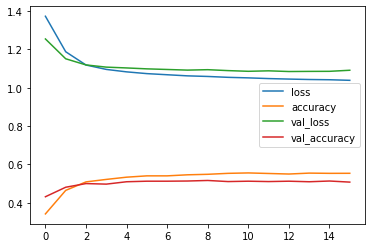

In [96]:
## Using the best model for further process - Model 2

## Increasing the number of hidden layers

## Model Building
model3=tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(30,activation='relu'))
model3.add(tf.keras.layers.Dense(10,activation='relu'))
model3.add(tf.keras.layers.Dense(4,activation='softmax'))

## Compiling the model
model3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Introducing early stop
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)


## Training the model
tf.random.set_seed(10)
## Validation split
hist3=model3.fit(x_train,y_train,epochs=50, validation_split=0.2,callbacks=[early_stop])
pd.DataFrame(hist3.history).plot();

# Model Evaluation
print(' Evaluation Result:\n')
model3.evaluate(x_test,y_test)